# Singly Linked List
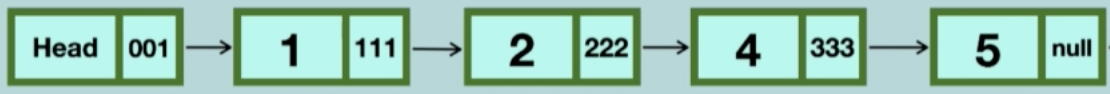

## Properties
- list of nodes where each node has a pointer to the next node in the link
- each node has a data value and link to next node in list
- final node in list has a pointer to null
- unlike an array, elements of a linked list are not located next to one another in memory
    - elements of a linked list are randomly allocated to different locations of memory
    - because of this we cannot access any location without a traversal like we can in an array
    - no index to identify the location of element, instead must traverse path from starting node
- in practice always use python list or deque, never create your own implementation of a linked list unless needed for very specific purposes

## Implementation 1
- maintains reference to tail
- does not maintain count of number of nodes
- allows for deletion / insertion at any point in list
- problems with this implementation:
    - insert method should have different argument to insert at end of list, because if you want to insert at index 1, there is no way to do so
    - would prefer to keep count of elements and allow you to remove last element using that count value rather than 1
        - keep track of count in insert / delete methods

In [25]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.next = None

In [46]:
class SinglyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        
    def traverse(self):
        temp = self.head
        while temp != None:
            print(temp.value)
            temp = temp.next
            
    def insert(self, value, location):
        node = Node(value)
        if self.head == None: # case where list is empty and insert method is called
            self.head = node
            self.tail = node
        else:
            if location == 0: # insert at beginning of list
                node.next = self.head
                self.head = node
            elif location == 1: # insert at end of list
                self.tail.next = node
                self.tail = node
            else: # insert at a given index location
                temp = self.head
                index = 0
                while index < location -1:
                    temp = temp.next
                    index += 1
                next_node = temp.next
                temp.next = node
                node.next = next_node
    def search(self, value):
        temp = self.head
        index = 0
        while temp != None:
            if temp.value == value:
                return index
            index+=1
            temp = temp.next
        return -1
    
    def delete(self, location):
        if self.head == None: # case where sll is empty
            return
        else:
            if location == 0:
                if self.head == self.tail:
                    self.head = None
                    self.tail = None
                else:
                    self.head = self.head.next
            elif location == 1:
                if self.head == self.tail:
                    self.head = None
                    self.tail = None
                else:
                    node = self.head
                    while node != None:
                        if node.next == self.tail:
                            break
                        node = node.next
                    node.next = None
                    self.tail = node
            else:
                temp = self.head
                index = 0
                while index < location-1:
                    temp = temp.next
                    index+=1
                temp.next = temp.next.next
    
    def clear_list(self):
        self.head = None
        self.tail = None
                    
                
                
        

## Implementation 2
    - does not maintain reference to tail
    - maintains count of number of nodes
    - separate methods for insert and delete at beginning / end
    - pop methods do not return the value that gets removed

In [56]:
class Node:
    def __init__(self, data=None, next_node=None):
        self.data = data
        self.next = next_node

In [62]:
class SLL:
    def __init__(self):
        self.head = None
        self.count = 0
    
    def traverse(self):
        node = self.head
        while node != None:
            print(node.data)
            node = node.next
            
    def append(self, value):
        node = Node(value, self.head)
        self.head = node
        self.count += 1
    
    def append_right(self, value):
        temp = self.head
        node = Node(value)
        while temp.next != None:
            temp = temp.next
        temp.next = node
        self.count += 1
    
    def insert(self, value, loc):
        temp = self.head
        node = Node(value)
        index = 0
        while index < loc - 1:
            temp = temp.next
            index += 1
        node.next = temp.next
        temp.next = node
        self.count += 1
    
    def search(self, value):
        temp = self.head
        while temp != None:
            if temp.data == value:
                return True
            else:
                temp = temp.next
        raise ValueError("Value is not in list")
        return False
    
    def pop(self):
        self.head = self.head.next
        self.count -= 1
    
    def pop_right(self):
        temp = self.head
        while temp.next.next != None:
            temp = temp.next
        temp.next = None
        self.count -= 1
    
    def delete(self, loc):
        temp = self.head
        index = 0
        while index < loc - 1:
            temp = temp.next
            index += 1
        temp.next = temp.next.next
        self.count -= 1
    
    def size(self):
        return self.count
                
        
        

In [78]:
a = SLL()
a.append(0)
a.append(1)
a.append(2)
a.append(3)

a.traverse()
print("")
print(format(a.size()))
print("")
      
a.append_right(-1)
a.append_right(-2)
a.append_right(-3)
a.traverse()
print("")

a.pop()
a.pop_right()
a.traverse()

print("")
a.insert(10, 1)
a.traverse()

print("")
a.delete(1)
a.traverse()

3
2
1
0

4

3
2
1
0
-1
-2
-3

2
1
0
-1
-2

2
10
1
0
-1
-2

2
1
0
-1
-2


## Operations

### Insert
- add an element to the linked list
- must change pointers to next, head, tail, etc. in order to maintain structure of list
- O(1) time complexity to insert at beginning, end of list
- O(n) time complexity to insert at middle of list at specified element
- O(1) space complexity

In [54]:
sll = SinglyLinkedList()
sll.insert(1,0)
sll.insert(2,0)
sll.insert(4,0)
sll.insert(4,1)
sll.insert(44,1)
sll.insert(6,2)
sll.traverse()

4
2
6
1
4
44


### Traverse
- visit each element in list
- O(N) time, O(1) space

In [48]:
sll.traverse()

4
2
6
1
4
44


### Search
- linear search that returns index of first instance of item
- O(n) time complexity and O(n) space
- returns -1 if not found in linked list

In [43]:
sll.search(44)

5

In [44]:
sll.search(4)

0

In [45]:
sll.search(-5)

-1

### Deletion
- rearranges links such that all links to and from node to be deleted are removed and the path of the list is maintained
- garbage collector will delete nodes from memory that are not properly linked
- O(N) time complexity
- O(1) space complexity

In [55]:
sll.traverse()
sll.delete(0)
print('deleted first element')
sll.traverse()
sll.delete(1)
print('deleted last element')
sll.traverse()
sll.delete(2)
print('deleted element at index 2')
sll.traverse()

4
2
6
1
4
44
deleted first element
2
6
1
4
44
deleted last element
2
6
1
4
deleted element at index 2
2
6
4


## Time Complexity of Singly Linked List Operations

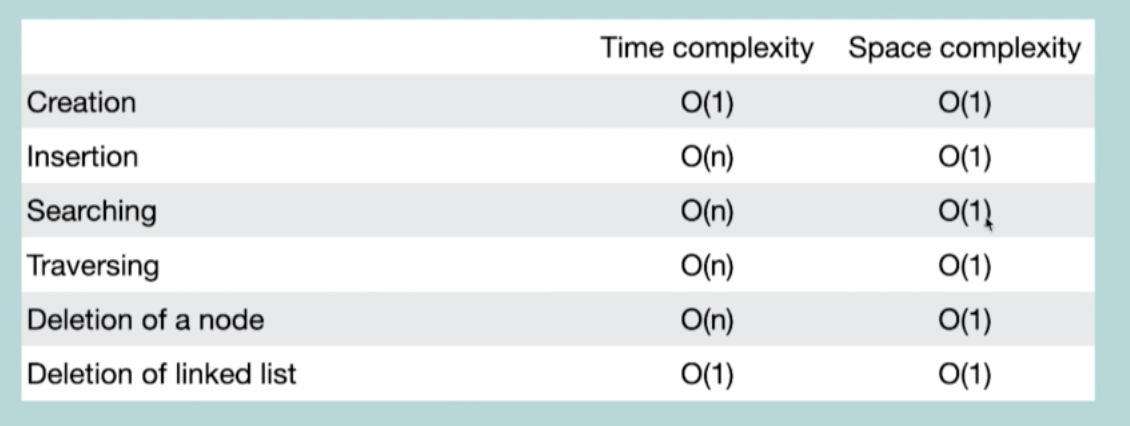